In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
path=r"C:\Users\DELL\Desktop\stage_pfe\testDUM\all_data\right_big_sample.csv"
df=pd.read_csv(path,low_memory=False,delimiter=',')

In [6]:
# List of columns to drop
columns_to_drop = ['MONTANT_LIQUIDATION_AMENDE','PAIEMENT_COMPTANT','ID_LIEU_STOCKAGE','REGLE_ALEATOIRE','MONTANT_LIQUIDATION_AMENDE']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [7]:
import pandas as pd


# Separate fraudulent and non-fraudulent events
fraudulent_df = df[df['FRAUD'] == 1]
non_fraudulent_df = df[df['FRAUD'] == 0]

# Sample one million rows from non-fraudulent events
sampled_non_fraudulent_df = non_fraudulent_df.sample(n=100000, random_state=42)  # You can adjust the random_state for reproducibility

# Combine fraudulent and sampled non-fraudulent events
final_df = pd.concat([fraudulent_df, sampled_non_fraudulent_df])

# Shuffle the final DataFrame to randomize the order
final_df = final_df.sample(frac=1, random_state=42)  # Shuffle while maintaining the random_state for reproducibility


In [8]:
final_df

,IDENTIFIANT_DUM,ID_OPERATEUR,DECLARANT_POUR_LUI_MEME,ID_TRANSITAIRE,PROVENANCE,TYPE_CAUTION,ANTICIPATION,COMBINEE,PROVISIONNELLE,BUREAU_SOUSCRIPTION,...,PAYSORIGINE,ACCORDS,FRANCHISE,POIDV0,QUANTITEV0,ASCODEUNITEMESUREV0,ADUM_NUM_QUANTNORMV0,CODEUNITENORMV0,VALEURV0,FRAUD
6315135,22858534,3717,O,3717,TR,NaN,N,N,N,300,...,TR,TR,NaN,"1230,000","10,000",33,10,29.0,"53740,000",0.0
233369,21398265,283341,N,307408,CN,NaN,N,N,N,309,...,CN,NaN,NaN,"1677,000","33900,000",33,33900,33.0,"27939,000",0.0
349916,21603131,258804,O,258804,GB,NaN,N,N,N,301,...,CN,NaN,NaN,"11,500","45,000",33,45,33.0,"5084,000",0.0
5284323,20891053,290301,N,11300,ES,NaN,N,N,N,301,...,CN,NaN,NaN,"6,480","24,000",49,24,33.0,"28062,000",0.0
294792,21500051,18048,N,1242,NL,NaN,N,N,N,301,...,CN,NaN,NaN,"0,100","1,000",2,1,33.0,"190,000",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051871,25957396,8365,O,8365,ES,Sur engagement des entreprises exportatrices,N,N,N,411,...,ES,NaN,NaN,"67,320","589,600",19,"67,32",29.0,"50000,000",0.0
3747054,24905000,9845,N,48249,FR,NaN,N,N,N,300,...,BE,UE,NaN,"3151,250","10896,000",2,"3151,25",29.0,"43946,000",0.0
4008971,24499529,10080,N,1268,ES,Sur engagement des entreprises exportatrices,N,N,N,411,...,IT,NaN,NaN,"77,000","77,000",29,77,29.0,"187,000",0.0
258476,21439680,306056,N,62939,FR,NaN,N,N,N,607,...,FR,UE,NaN,"23870,000","23870,000",23,23870,29.0,"61481,000",1.0


In [9]:
#displaying the missing values 
missing_values = final_df.isnull().sum()
missing_values

IDENTIFIANT_DUM                 0
ID_OPERATEUR                    0
DECLARANT_POUR_LUI_MEME         0
ID_TRANSITAIRE                  0
PROVENANCE                      0
TYPE_CAUTION                90880
ANTICIPATION                    0
COMBINEE                        0
PROVISIONNELLE                  0
BUREAU_SOUSCRIPTION             0
REGIME_SOUSCRIPTION             0
POIDSBRUTTOTAL                  0
POIDSNETTOTAL                   0
ARDDD                          42
ARDTR                      107186
IDLOTS                      19569
RESELECTION                     0
DATEENREGISTREMENT              0
DATEDEPOT                      42
DATEDEPOTTR                107272
AGENT_COTE                     48
DATECTRL                      260
DATEEDITIONMLV                487
DATEENLEVEMENT              16592
NUMEROORDRE                     0
NGPV0                           0
CONTENANTS                      0
ARTICLESAPSP                    0
PAYSORIGINE                     0
ACCORDS       

In [10]:
#drop the columns with highest percentage 
import pandas as pd

seuil = 0.06

# Calculer le pourcentage de valeurs manquantes dans chaque colonne
missing_percentages = final_df.isna().mean() * 100

# Filtrer les colonnes ayant un pourcentage de valeurs manquantes inférieur au seuil
selected_columns = missing_percentages[missing_percentages < seuil].index

# Créer un nouveau DataFrame avec les colonnes sélectionnées
df= final_df[selected_columns]

In [11]:
df.columns

Index(['IDENTIFIANT_DUM', 'ID_OPERATEUR', 'DECLARANT_POUR_LUI_MEME',
       'ID_TRANSITAIRE', 'PROVENANCE', 'ANTICIPATION', 'COMBINEE',
       'PROVISIONNELLE', 'BUREAU_SOUSCRIPTION', 'REGIME_SOUSCRIPTION',
       'POIDSBRUTTOTAL', 'POIDSNETTOTAL', 'ARDDD', 'RESELECTION',
       'DATEENREGISTREMENT', 'DATEDEPOT', 'AGENT_COTE', 'NUMEROORDRE', 'NGPV0',
       'CONTENANTS', 'ARTICLESAPSP', 'PAYSORIGINE', 'POIDV0', 'QUANTITEV0',
       'ASCODEUNITEMESUREV0', 'ADUM_NUM_QUANTNORMV0', 'VALEURV0', 'FRAUD'],
      dtype='object')

In [12]:
df.dtypes

IDENTIFIANT_DUM              int64
ID_OPERATEUR                 int64
DECLARANT_POUR_LUI_MEME     object
ID_TRANSITAIRE               int64
PROVENANCE                  object
ANTICIPATION                object
COMBINEE                    object
PROVISIONNELLE              object
BUREAU_SOUSCRIPTION          int64
REGIME_SOUSCRIPTION          int64
POIDSBRUTTOTAL              object
POIDSNETTOTAL               object
ARDDD                      float64
RESELECTION                 object
DATEENREGISTREMENT          object
DATEDEPOT                   object
AGENT_COTE                  object
NUMEROORDRE                float64
NGPV0                        int64
CONTENANTS                   int64
ARTICLESAPSP                object
PAYSORIGINE                 object
POIDV0                      object
QUANTITEV0                  object
ASCODEUNITEMESUREV0          int64
ADUM_NUM_QUANTNORMV0        object
VALEURV0                    object
FRAUD                      float64
dtype: object

In [13]:
cols=['POIDSBRUTTOTAL','POIDSNETTOTAL','QUANTITEV0','POIDV0','ADUM_NUM_QUANTNORMV0']

for i in cols:
    df[i]=df[i].astype(str).str.replace(',','.')
    df[i]=df[i].astype(float)


C:\Users\DELL\AppData\Local\Temp\ipykernel_2472\2070888749.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].astype(str).str.replace(',','.')
C:\Users\DELL\AppData\Local\Temp\ipykernel_2472\2070888749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].astype(float)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2472\2070888749.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [14]:
df.dtypes

IDENTIFIANT_DUM              int64
ID_OPERATEUR                 int64
DECLARANT_POUR_LUI_MEME     object
ID_TRANSITAIRE               int64
PROVENANCE                  object
ANTICIPATION                object
COMBINEE                    object
PROVISIONNELLE              object
BUREAU_SOUSCRIPTION          int64
REGIME_SOUSCRIPTION          int64
POIDSBRUTTOTAL             float64
POIDSNETTOTAL              float64
ARDDD                      float64
RESELECTION                 object
DATEENREGISTREMENT          object
DATEDEPOT                   object
AGENT_COTE                  object
NUMEROORDRE                float64
NGPV0                        int64
CONTENANTS                   int64
ARTICLESAPSP                object
PAYSORIGINE                 object
POIDV0                     float64
QUANTITEV0                 float64
ASCODEUNITEMESUREV0          int64
ADUM_NUM_QUANTNORMV0       float64
VALEURV0                    object
FRAUD                      float64
dtype: object

In [39]:
df.to_csv("100000ligne_28feature.csv",index=False,sep=',')

In [15]:
from pycaret.classification import *
#pycaret's initializinf function
# Step 3: Identify the target variable
target_variable = 'FRAUD'

# Step 4: Initialize PyCaret
clf = setup(df, target=target_variable, preprocess=True, use_gpu=True,normalize = True)

,Description,Value
0,Session id,1197
1,Target,FRAUD
2,Target type,Binary
3,Original data shape,"(107582, 28)"
4,Transformed data shape,"(107582, 28)"
5,Transformed train set shape,"(75307, 28)"
6,Transformed test set shape,"(32275, 28)"
7,Ordinal features,5
8,Numeric features,15
9,Categorical features,12


In [16]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9609,0.7564,0.4863,0.9207,0.6363,0.6177,0.6531,8.6760
lightgbm,Light Gradient Boosting Machine,0.9606,0.7873,0.4818,0.9218,0.6326,0.6139,0.6503,9.3410
rf,Random Forest Classifier,0.9605,0.8626,0.4811,0.9217,0.6319,0.6132,0.6498,8.0260
gbc,Gradient Boosting Classifier,0.9605,0.8772,0.4814,0.9201,0.6318,0.6132,0.6494,29.8440
et,Extra Trees Classifier,0.9605,0.9208,0.4811,0.9217,0.6319,0.6132,0.6498,7.2840
xgboost,Extreme Gradient Boosting,0.9605,0.8724,0.4803,0.9209,0.6311,0.6124,0.6489,6.2990
ada,Ada Boost Classifier,0.9604,0.8288,0.4797,0.9212,0.6307,0.6120,0.6486,10.8130
lr,Logistic Regression,0.9603,0.9497,0.4799,0.9178,0.6300,0.6112,0.6474,11.8640
lda,Linear Discriminant Analysis,0.9603,0.9648,0.4844,0.9105,0.6321,0.6132,0.6476,5.7140
ridge,Ridge Classifier,0.9602,0.0000,0.4822,0.9111,0.6303,0.6114,0.6463,4.8420


In [17]:

# Step 2: Train the QDA model
qda_model = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9213,0.9593,0.8832,0.4690,0.6127,0.5734,0.6091
1,0.9126,0.9706,0.9115,0.4420,0.5953,0.5529,0.5986
2,0.9071,0.9744,0.9454,0.4280,0.5892,0.5450,0.5997
3,0.8757,0.9642,0.9228,0.3538,0.5115,0.4560,0.5253
4,0.8789,0.9647,0.9322,0.3611,0.5205,0.4663,0.5354
5,0.7018,0.9001,0.9736,0.1881,0.3152,0.2235,0.3482
6,0.8818,0.9312,0.8324,0.3556,0.4983,0.4433,0.4951
7,0.9220,0.9665,0.9113,0.4721,0.6220,0.5834,0.6228
8,0.8311,0.9600,0.9377,0.2863,0.4387,0.3708,0.4620


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

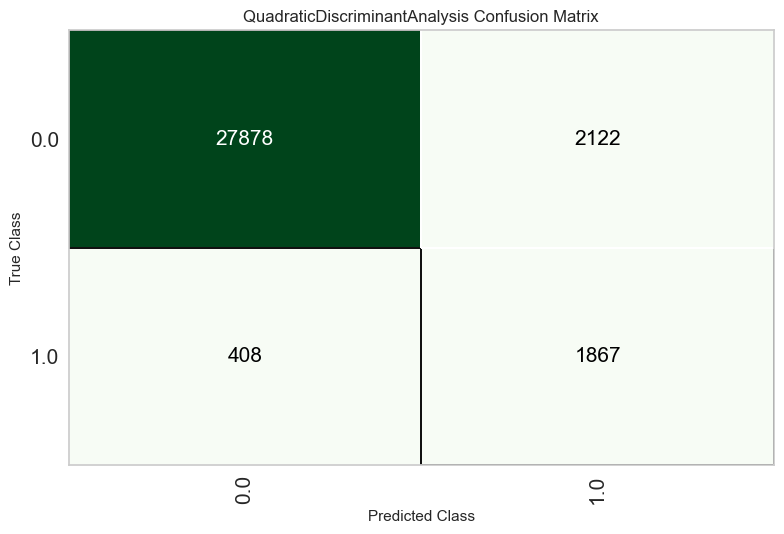

In [18]:
# Step 3: Plot the confusion matrix for the QDA model
plot_model(qda_model, plot='confusion_matrix')

In [19]:

# Step 2: Train the nb model
nb_model = create_model('nb')

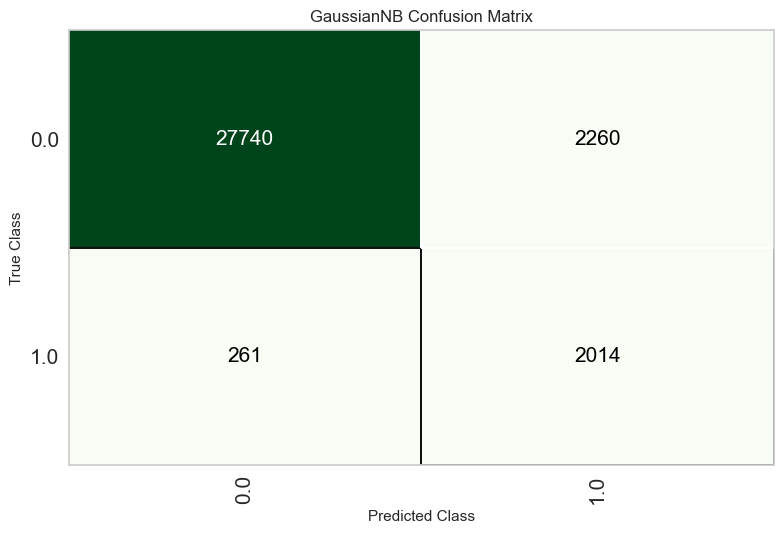

In [20]:
# Step 3: Plot the confusion matrix for the QDA model
plot_model(nb_model, plot='confusion_matrix')

#EXPLORATION

In [21]:
#retrieve the transformed data 
xtrain=clf.X_train_transformed
ytrain=clf.y_train_transformed
xtest=clf.X_test_transformed
ytest=clf.y_test_transformed

In [40]:
xtrain

,IDENTIFIANT_DUM,ID_OPERATEUR,DECLARANT_POUR_LUI_MEME,ID_TRANSITAIRE,PROVENANCE,ANTICIPATION,COMBINEE,PROVISIONNELLE_N,BUREAU_SOUSCRIPTION,REGIME_SOUSCRIPTION,...,NUMEROORDRE,NGPV0,CONTENANTS,ARTICLESAPSP,PAYSORIGINE,POIDV0,QUANTITEV0,ASCODEUNITEMESUREV0,ADUM_NUM_QUANTNORMV0,VALEURV0
1276161,0.245939,0.468557,-0.353614,-0.606147,-0.022495,-0.214416,-0.061526,0.0,-0.442453,-0.27248,...,-0.122224,-2.251718,-0.408597,-0.586024,1.007513,-0.039297,-0.053555,0.424662,-0.040528,-0.266784
6511591,-0.480224,0.257836,-0.353614,-0.605779,-0.022495,-0.214416,-0.061526,0.0,-0.554823,-0.27248,...,-0.315788,0.332294,-0.408597,-0.586024,-0.435237,-0.040755,-0.054820,-0.952575,-0.041965,0.561434
2056242,0.984185,-0.702396,-0.353614,-0.603556,0.055730,-0.214416,-0.061526,0.0,-0.554823,-0.27248,...,-0.548065,0.845944,-0.387705,-0.586024,0.414956,-0.036377,-0.052441,-0.952575,-0.037649,-0.266784
1601839,-0.081155,1.147460,-0.353614,-0.597417,-0.694002,-0.214416,-0.061526,0.0,-0.442453,-0.27248,...,-0.470639,0.096346,-0.408597,-0.586024,-0.857668,-0.040601,-0.054816,0.096749,-0.041986,-0.368953
3052763,-0.866096,-0.252552,-0.353614,-0.604417,-0.022495,-0.214416,-0.061526,0.0,0.831065,-0.27248,...,-0.238362,0.847414,-0.408597,1.706414,1.007513,-0.040778,-0.054814,1.080490,-0.041984,-0.646184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594091,-1.282799,-0.792846,-0.353614,-0.512980,3.115023,-0.214416,-0.061526,0.0,-0.442453,-0.27248,...,-0.354501,0.830120,-0.408597,-0.586024,-0.791841,-0.040724,-0.054823,-0.952575,-0.041994,-0.266784
2896863,-0.631974,0.713265,-0.353614,2.035499,-0.022495,-0.214416,-0.061526,0.0,0.831065,-0.27248,...,-0.548065,0.925295,5.963317,1.706414,1.007513,-0.040662,-0.054757,-0.952575,-0.041874,3.078264
905368,-0.129362,1.075505,-0.353614,-0.051331,-0.022495,-0.214416,-0.061526,0.0,0.831065,-0.27248,...,-0.277075,0.289445,-0.408597,1.706414,2.129275,-0.040708,-0.054823,1.080490,-0.041994,0.900903
5930903,-0.468743,-0.816356,-0.353614,0.863470,3.115023,-0.214416,-0.061526,0.0,-0.554823,-0.27248,...,-0.277075,-0.457944,-0.408597,-0.586024,2.129275,-0.040777,-0.054819,1.080490,-0.041990,-0.284708


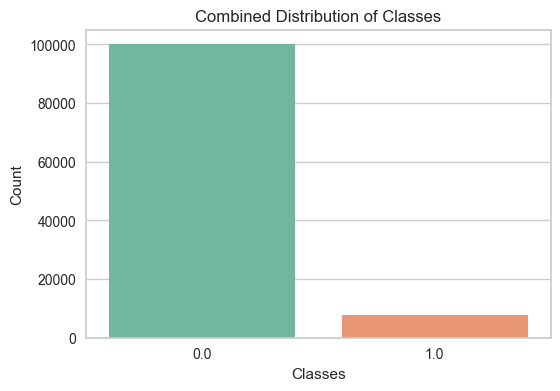

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine y_train and y_test for plotting
combined_data = pd.concat([ytrain, ytest], ignore_index=True)

plt.figure(figsize=(6, 4))
sns.countplot(x=combined_data, palette='Set2')
plt.title('Combined Distribution of Classes')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()


#FIN EXPLORATION


In [23]:
path=r"C:\Users\DELL\Desktop\stage_pfe\testDUM\all_data\Result_Script.csv"
dftest=pd.read_csv(path,sep=';',encoding='latin-1')

In [24]:
dftest.dtypes

IDENTIFIANT_DUM                 int64
ID_OPERATEUR                    int64
DECLARANT_POUR_LUI_MEME        object
ID_TRANSITAIRE                  int64
MONTANT_LIQUIDATION_AMENDE      int64
PAIEMENT_COMPTANT              object
PROVENANCE                     object
ID_LIEU_STOCKAGE               object
TYPE_CAUTION                   object
ANTICIPATION                   object
COMBINEE                       object
PROVISIONNELLE                 object
BUREAU_SOUSCRIPTION             int64
REGIME_SOUSCRIPTION             int64
POIDSBRUTTOTAL                float64
POIDSNETTOTAL                 float64
ARDDD                         float64
ARDTR                         float64
RÉSULTAT_SELECTIVITE           object
RESELECTION                    object
REGLE_ALEATOIRE                 int64
DATEENREGISTREMENT             object
DATEDEPOT                      object
DATEDEPOTTR                   float64
AGENT_COTE                     object
DATECTRL                       object
DATEEDITIONM

In [25]:
dftest['RÉSULTAT_SELECTIVITE'] = dftest['RÉSULTAT_SELECTIVITE'].apply(lambda x: 0 if x == 'AC' else 1)

In [26]:
dftest.rename(columns={'RÉSULTAT_SELECTIVITE':'FRAUD'},inplace=True)

In [27]:
columns_to_keep = ['IDENTIFIANT_DUM', 'ID_OPERATEUR', 'DECLARANT_POUR_LUI_MEME',
       'ID_TRANSITAIRE', 'PROVENANCE', 'ANTICIPATION', 'COMBINEE',
       'PROVISIONNELLE', 'BUREAU_SOUSCRIPTION', 'REGIME_SOUSCRIPTION',
       'POIDSBRUTTOTAL', 'POIDSNETTOTAL', 'ARDDD', 'RESELECTION',
       'DATEENREGISTREMENT', 'DATEDEPOT', 'AGENT_COTE', 'NUMEROORDRE', 'NGPV0',
       'CONTENANTS', 'ARTICLESAPSP', 'PAYSORIGINE', 'POIDV0', 'QUANTITEV0',
       'ASCODEUNITEMESUREV0', 'ADUM_NUM_QUANTNORMV0', 'VALEURV0', 'FRAUD']
dftest = dftest[columns_to_keep]

In [32]:
dftest=dftest.drop('FRAUD',axis=1)

In [33]:
dftest.shape

(95217, 27)